###  Import py file

In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent / "src"))
import complaint_analysis

### Load the dataset

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/home/samrawit/creditrust-RAG/data/complaints.csv')

# Display the first few rows and general info
print(df.head())
print(df.info())

/tmp/ipykernel_18415/541401985.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/samrawit/creditrust-RAG/data/complaints.csv')


  Date received                                            Product  \
0    2025-06-20  Credit reporting or other personal consumer re...   
1    2025-06-20                                    Debt collection   
2    2025-06-20  Credit reporting or other personal consumer re...   
3    2025-06-20  Credit reporting or other personal consumer re...   
4    2025-06-20  Credit reporting or other personal consumer re...   

               Sub-product                                 Issue  \
0         Credit reporting  Incorrect information on your report   
1  Telecommunications debt     Attempts to collect debt not owed   
2         Credit reporting           Improper use of your report   
3         Credit reporting           Improper use of your report   
4         Credit reporting  Incorrect information on your report   

                                       Sub-issue Consumer complaint narrative  \
0            Information belongs to someone else                          NaN   
1       

In [3]:
print(df.head())


  Date received                                            Product  \
0    2025-06-20  Credit reporting or other personal consumer re...   
1    2025-06-20                                    Debt collection   
2    2025-06-20  Credit reporting or other personal consumer re...   
3    2025-06-20  Credit reporting or other personal consumer re...   
4    2025-06-20  Credit reporting or other personal consumer re...   

               Sub-product                                 Issue  \
0         Credit reporting  Incorrect information on your report   
1  Telecommunications debt     Attempts to collect debt not owed   
2         Credit reporting           Improper use of your report   
3         Credit reporting           Improper use of your report   
4         Credit reporting  Incorrect information on your report   

                                       Sub-issue Consumer complaint narrative  \
0            Information belongs to someone else                          NaN   
1       

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

In [5]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

### Perform Initial EDA

Analyze Distribution of Complaints Across Different Products

Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                           86205
Vehicle loan or lease   

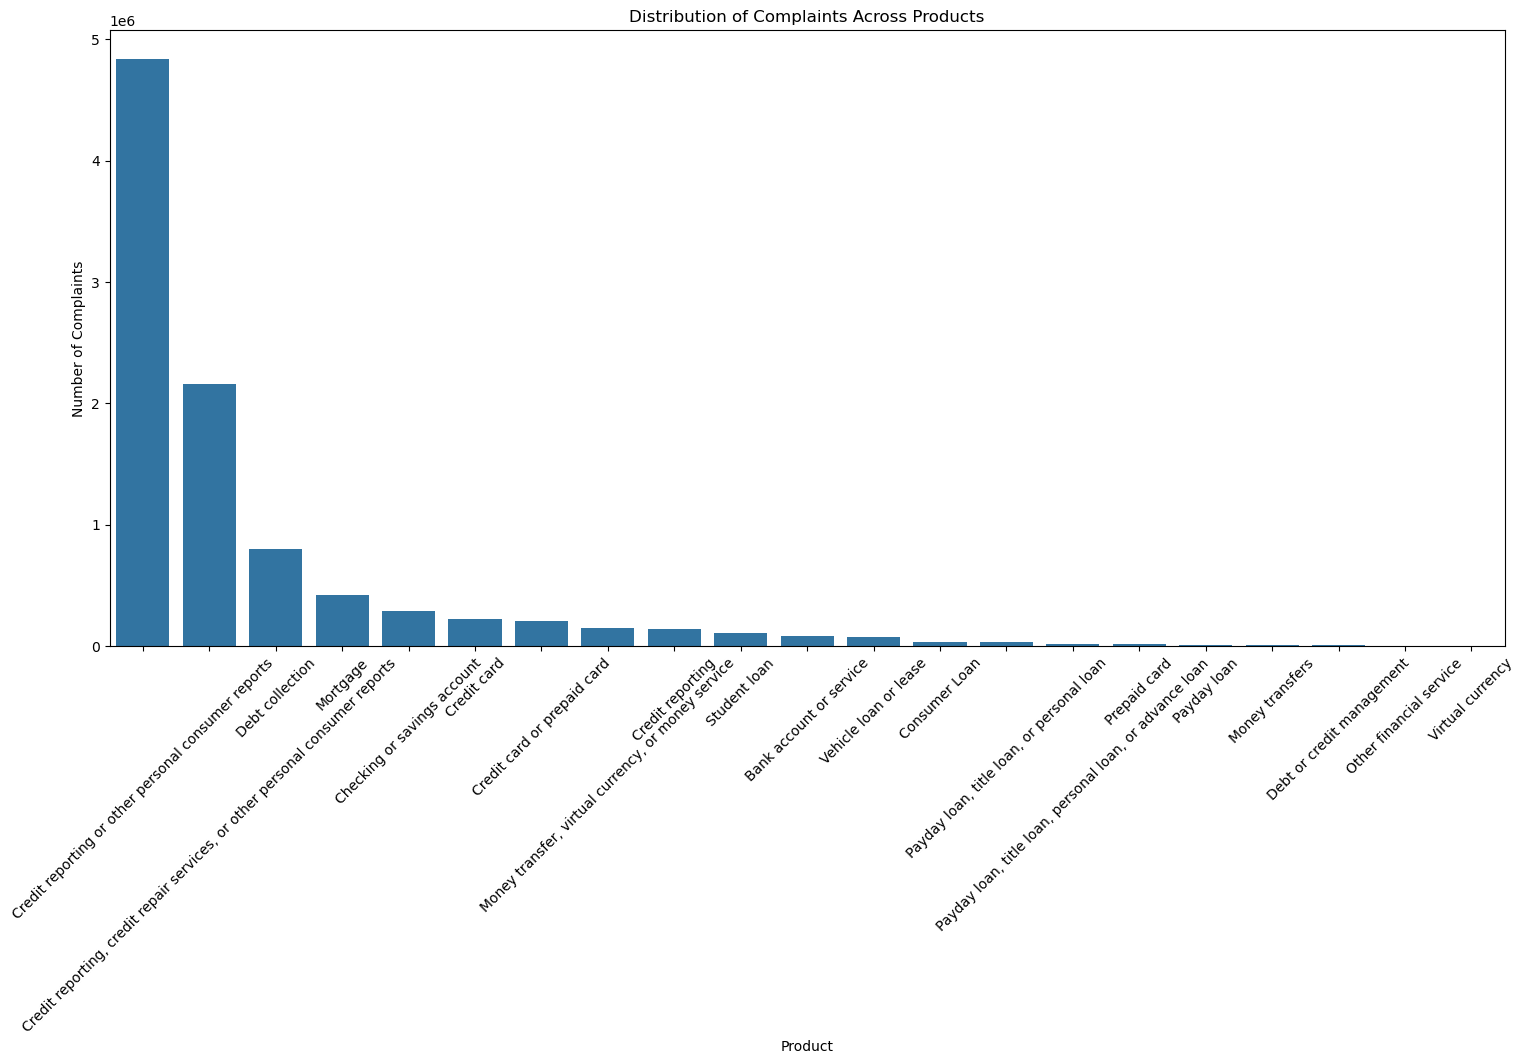

In [8]:
product_counts = df['Product'].value_counts()
print(product_counts)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 8)) 
sns.barplot(x=product_counts.index, y=product_counts.values)
plt.title('Distribution of Complaints Across Products')
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.show()

Calculate and Visualize the Length of Consumer Complaint Narratives

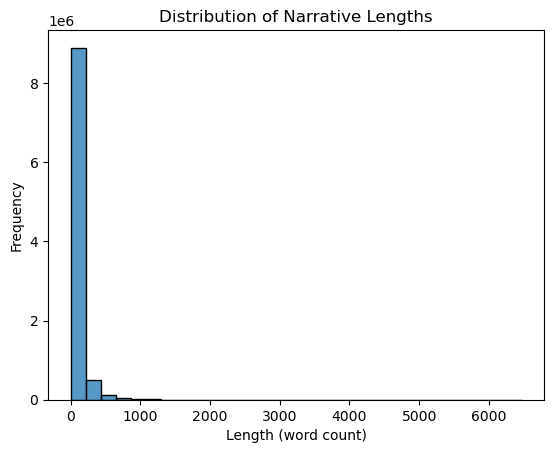

In [9]:
df['narrative_length'] = df['Consumer complaint narrative'].apply(lambda x: len(str(x).split()))

# Visualizing the distribution
sns.histplot(df['narrative_length'], bins=30)
plt.title('Distribution of Narrative Lengths')
plt.xlabel('Length (word count)')
plt.ylabel('Frequency')
plt.show()

Identify Complaints with and Without Narratives

In [ ]:
complaints_with_narrative = df['Consumer complaint narrative'].notnull().sum()
complaints_without_narrative = df['Consumer complaint narrative'].isnull().sum()

print(f'Complaints with narrative: {complaints_with_narrative}')
print(f'Complaints without narrative: {complaints_without_narrative}')

### Filter the Dataset

Filter for Specified Products and Remove Empty Narratives

In [ ]:
specified_products = ['Credit card', 'Personal loan', 'Buy Now, Pay Later', 'Savings account', 'Money transfers']
filtered_df = df[(df['Product'].isin(specified_products)) & (df['Consumer complaint narrative'].notnull())]

Clean the Text Narratives

In [ ]:
import re

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    # Remove boilerplate text (customize as necessary)
    text = re.sub(r'i am writing to file a complaint.*', '', text)
    return text.strip()

filtered_df['cleaned_narrative'] = filtered_df['Consumer complaint narrative'].apply(clean_text)

### Save the Cleaned Dataset

In [ ]:
filtered_df.to_csv('data/filtered_complaints.csv', index=False)

In [ ]:
# Import necessary libraries
import pandas as pd
import runpy
import complaint_analysis

# Step 1: Download NLTK resources
complaint_analysis.download_nltk_resources()

# Step 2: Initialize NLTK components
stop_words, lemmatizer = complaint_analysis.initialize_nltk_components()

# Step 3: Load the dataset
file_path = '../data/raw_complaints.csv'
df = complaint_analysis.load_dataset(file_path)

# Step 4: Check for missing values
missing_values = complaint_analysis.check_missing_values(df)
print(missing_values)

# Step 5: Analyze product distribution
complaint_analysis.analyze_product_distribution(df)

# Step 6: Filter data
products_to_keep = ['Credit card', 'Personal loan', 'Payday loan', 'Savings account', 'Money transfers']
df_filtered = complaint_analysis.filter_data(df, products_to_keep)

# Step 7: Analyze narrative length
complaint_analysis.analyze_narrative_length(df_filtered)

# Step 8: Apply text cleaning
complaint_analysis.apply_text_cleaning(df_filtered, stop_words, lemmatizer)

# Step 9: Save the cleaned data
output_file_path = '../data/filtered_and_cleaned_complaints.csv'
complaint_analysis.save_cleaned_data(df_filtered, output_file_path)

# Step 10: Clean up
complaint_analysis.clean_up(df_filtered)

In [10]:
# Import necessary libraries
import pandas as pd
import runpy
import complaint_analysis

In [21]:
# Step 1: Download NLTK resources
complaint_analysis.download_nltk_resources()

NLTK resources downloaded/checked.


In [22]:
# Step 2: Initialize NLTK components
stop_words, lemmatizer = complaint_analysis.initialize_nltk_components()

In [13]:

# Step 3: Load the dataset
file_path = '/home/samrawit/creditrust-RAG/data/complaints.csv'
df = complaint_analysis.load_dataset(file_path)

Attempting to load data from: /home/samrawit/creditrust-RAG/data/complaints.csv


/home/samrawit/creditrust-RAG/src/complaint_analysis.py:44: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='utf-8')


Dataset loaded successfully with UTF-8 encoding.


In [14]:
# Step 4: Check for missing values
missing_values = complaint_analysis.check_missing_values(df)
print(missing_values)


--- Missing Values Count ---
                              Missing Count  Missing %
Tags                                8981029  93.457011
Consumer disputed?                  8841498  92.005044
Consumer complaint narrative        6629041  68.982113
Company public response             4770207  49.638999
Consumer consent provided?          1649561  17.165409
Sub-issue                            839522   8.736105
Sub-product                          235295   2.448491
State                                 54516   0.567296
ZIP code                              30228   0.314554
Company response to consumer             20   0.000208
Issue                                     6   0.000062


In [18]:
df.shape

(9609797, 18)


--- Distribution of Complaints by Product ---


/home/samrawit/creditrust-RAG/src/complaint_analysis.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.index, y=product_counts.values, palette='viridis')


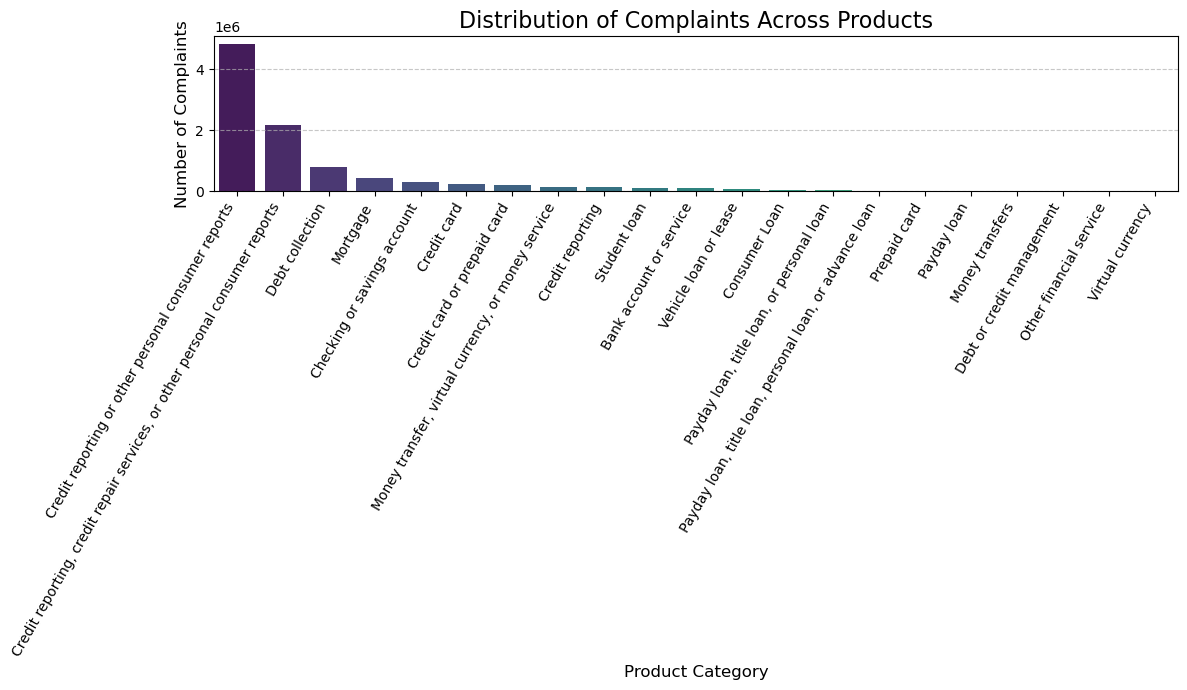

In [15]:
# Step 5: Analyze product distribution
complaint_analysis.analyze_product_distribution(df)

In [16]:
# Step 6: Filter data
products_to_keep = ['Credit card', 'Personal loan', 'Payday loan', 'Savings account', 'Money transfers']
df_filtered = complaint_analysis.filter_data(df, products_to_keep)

Filtered by products. New shape: (83910, 18)



Descriptive statistics for narrative length (word count):
count    83910.000000
mean       198.842176
std        220.921230
min          2.000000
25%         63.000000
50%        140.000000
75%        258.000000
max       6469.000000
Name: narrative_length, dtype: float64


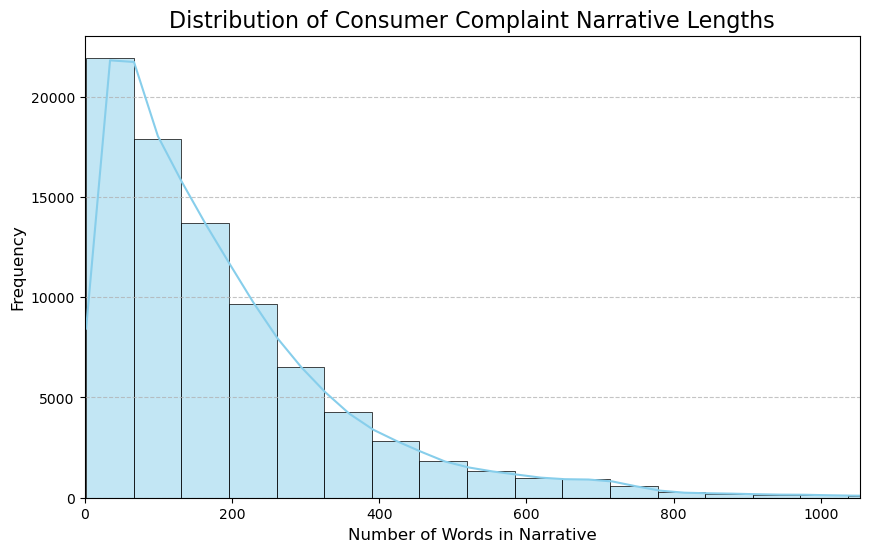

In [19]:
# Step 7: Analyze narrative length
complaint_analysis.analyze_narrative_length(df_filtered)

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from complaint_analysis import download_nltk_resources, initialize_nltk_components

# 🟢 This will download wordnet, stopwords, and punkt if not available
download_nltk_resources()

# Now initialize components
stop_words, lemmatizer = initialize_nltk_components()


NLTK resources downloaded/checked.


In [39]:
import nltk

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /home/samrawit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/samrawit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/samrawit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/samrawit/nltk_data...


True

In [40]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [41]:
# Step 8: Apply text cleaning
from complaint_analysis import apply_text_cleaning



In [42]:
complaint_analysis.apply_text_cleaning(df_filtered, stop_words, lemmatizer)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/home/samrawit/nltk_data'
    - '/home/samrawit/anaconda3/nltk_data'
    - '/home/samrawit/anaconda3/share/nltk_data'
    - '/home/samrawit/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
# Step 9: Save the cleaned data
output_file_path = '../data/filtered_and_cleaned_complaints.csv'
complaint_analysis.save_cleaned_data(df_filtered, output_file_path)


In [ ]:

# Step 10: Clean up
complaint_analysis.clean_up(df_filtered)